# ***Modelo SVR (Support Vector Regression)***

In [8]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [9]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'model_input_table'
]

In [10]:
catalog.load("model_input_table")

[10/26/25 02:54:03] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=634919;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=54232;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,Alto,0,0,0,179,69.000000,107500000.0,250000.0,206900000.0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,Alto,0,0,0,189,82.000000,93000000.0,140000.0,160400000.0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,Alto,0,0,0,182,83.000000,44500000.0,135000.0,91200000.0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,Medio,0,0,0,172,69.000000,37000000.0,45000.0,77700000.0,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,Alto,0,0,0,177,75.000000,108000000.0,160000.0,186300000.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,Bajo,0,0,0,185,64.863656,50000.0,5000.0,113000.0,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,Bajo,0,0,0,190,81.192968,35000.0,5000.0,58000.0,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,Bajo,0,0,0,183,79.832192,35000.0,1000.0,66000.0,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,Bajo,0,0,0,190,78.925008,60000.0,5000.0,146000.0,2020


In [11]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=911556;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=830422;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [12]:
df_FIFA.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,Alto,0,0,0,179,69.0,107500000.0,250000.0,206900000.0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,Alto,0,0,0,189,82.0,93000000.0,140000.0,160400000.0,2022


#### **Importaciones**

In [13]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

# -- Procesado y modelado --
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler

# -- Metricas --
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

# -- CrossValidation -- 
from sklearn.model_selection import cross_val_score

## **Desarrollo del Modelo SVR**
![Image](https://miro.medium.com/1*bxxbmAIbn8iqv7zJlk576Q.png)


#### **Conceptos claves**

**Vectores de soporte:** Son precisamente los puntos mas cercanos entre una clase y otra.

**Margen:** Es la distancia entre el hiperplano y los vectores de soporte

**Hiperplano:** Es la recta que mejor representa el comportamiento de los datos

**Hiperplano óptimo:** La frontera de separación quien consigue el mayor margen posible.

#### **Objetivos al utilizar el modelo SVM**

- El objetivo de optimización es maximizar el “margen”

- podemos trazar una linea o varias lineas, y ver cuales de las lineas es mejor y que ayude a separar esas dos clases

- El modelo de separación nos funciona tanto para de regresión como de clasificación


#### **Selección de caracteristicas**

In [15]:
X = df_FIFA[["Reactions","Age"]] 
#y = df_FIFA['Value_num']
y = df_FIFA['Value_num'].values.reshape(-1, 1)

#### **División de los datos en entrenamiento y prueba**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = True)

print("Datos de entrenamiento: ",X_train.shape)
print("Datos de prueba: ",X_test.shape)

Datos de entrenamiento:  (40420, 2)
Datos de prueba:  (10106, 2)


#### **Escala de los datos**

**¿Porque escalar caracteristicas en SVM?**

El escalado de características consiste en mapear (encontrar) los valores de las características de un conjunto de datos dentro del mismo rango.

Entrenar una SVM con datos escalados y no escalados genera diferentes modelos.

La estandarización cambia los valores de las características para que tengan una media de cero y luego los asigna a un rango tal que tienen una desviación estándar de 1.

In [24]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

#### **Creación y entrenamiento del modelo SVR**
**Sklearn-SVM:** [sklearn-SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)	

In [25]:
modelo = SVR(kernel='rbf') 
#model.fit(X_train, y_train)
modelo.fit(X_train_scaled, y_train_scaled.ravel())

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


#### **Predicciones sobre el conjunto de prueba**

In [26]:
#Y_pred = model.predict(X_test)
y_pred_scaled = modelo.predict(X_test_scaled)

In [27]:
#Desescalar las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

#### **Métricas de evaluación**

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("-- Métricas de Evaluación del Modelo --")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R² (Variance score): {r2:.2f}")

-- Métricas de Evaluación del Modelo --
Mean Squared Error (MSE): 10363713693087.297
Root Mean Squared Error (RMSE): 3219272.2303476133
Mean Absolute Error (MAE): 1353718.6818861542
R² (Variance score): 0.72


#### **Visualización grafica**

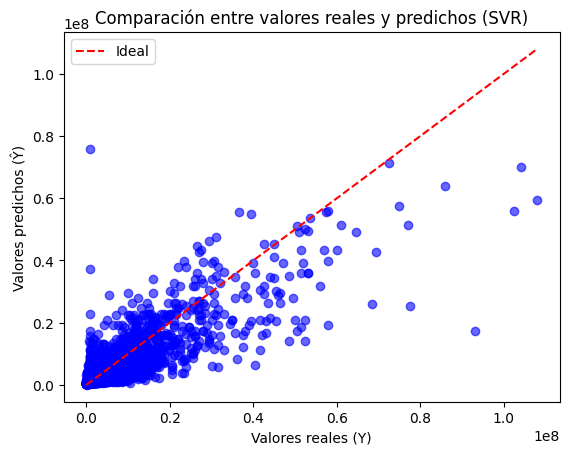

In [30]:

plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores reales (Y)')
plt.ylabel('Valores predichos (Ŷ)')
plt.title('Comparación entre valores reales y predichos (SVR)')
plt.legend()
plt.show()

### **GridsearchCV**

#### **Parametros del SVR scikit-learn.**

Con la clase sklearn.svm.SVR podemos manipular los parametros a nuestro gusto para poder obtener el mejor modelo posible de predicción.

#### **Parametros**

**CV=5:** La validación cruzada K-Fold es una técnica robusta que se utiliza para evaluar el rendimiento de los modelos de aprendizaje automático.

**C:** Penalización (debe ser positiva)

Epsilon: Nos dicen que el valor de epsilon "ϵ" define un margen de tolerancia donde no se penaliza ningún error.

**gamma:** Si gamma='scale' se pasa (predeterminado), se utiliza 1 / (n_features * X.var()) como valor de gamma,

si es 'auto', usa 1 / n_features

In [31]:
# Aqui se modifica
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10],
    'epsilon': [0.1],
    'gamma': ['scale'],
}
# cv=5 indica que se usará validación cruzada con 5 folds
grid_search = GridSearchCV(SVR(), param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1
                          )

# Ejecucion de los mejores hiperparámetros
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprime el mejor score (MSE negativo)
print("Mejor score (neg_mean_squared_error):", grid_search.best_score_)

# Obtiene el mejor modelo encontrado
best_svr_model = grid_search.best_estimator_

# Ahora puedes usar best_svr_model para hacer predicciones en X_test_scaled
y_pred_best_scaled = best_svr_model.predict(X_test_scaled)

# Desescala las predicciones
y_pred_best = scaler_y.inverse_transform(y_pred_best_scaled.reshape(-1, 1))

# Evalúa el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print("\n--- Metricas del mejor modelo (después de GridSearchCV) ---")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R2 Score: {r2_best}")

Mejores hiperparámetros: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score (neg_mean_squared_error): -0.26633845851399607

--- Metricas del mejor modelo (después de GridSearchCV) ---
Mean Squared Error (MSE): 10801348746123.006
Mean Absolute Error (MAE): 1354097.932271282
Root Mean Squared Error (RMSE): 3286540.543812446
R2 Score: 0.7063914519787688


## **Resultados y Conclusiones**

#### **Resultado 1:** Modelo sin hiperparametros
#### **Resultado 2:** GridsearchCV